## Thresholding Techniques:
Thresholding is a type of image segmentation, where we change the pixels of an image to make the image easier to analyze. In thresholding, we convert an image from color or grayscale into a binary image, i.e., one that is simply black and white.       

we use thresholding as a way to select areas of interest of an image, while ignoring the parts we are not concerned with. 

**Techniques involved in thresholding the image:**

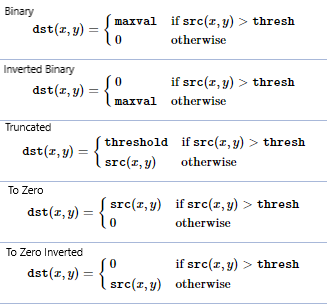

**Link:** https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

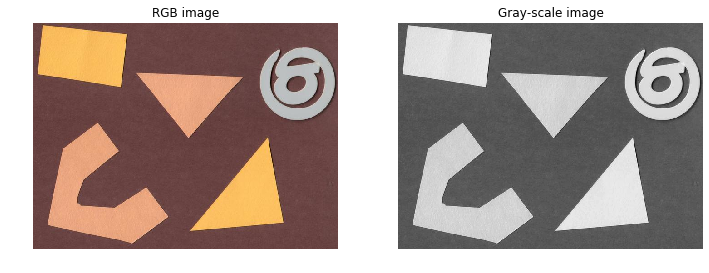

In [2]:
# importing library
import cv2
import matplotlib.pyplot as plt
import numpy as np
# reading an image
shapes_bgr= cv2.imread("./data/shapes_1.jpg")
shapes_rgb= cv2.cvtColor(shapes_bgr, cv2.COLOR_BGR2RGB)

#converting to grayscale
shapes_gray= cv2.cvtColor(shapes_bgr, cv2.COLOR_BGR2GRAY)

# plotting
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("RGB image")
ax1.axis("off")
ax1.imshow(shapes_rgb)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Gray-scale image")
ax2.axis("off")
ax2.imshow(shapes_gray,cmap= "gray")
plt.show()

Its better to get a histogram before binarizing the image to analyze and get an appropriate threshold value to be used.Histogram can be prefered in single channel grayscale image.

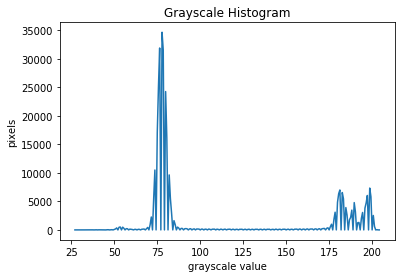

In [3]:
# before applying the histogram ,lets blur the image bit
blur_image= cv2.GaussianBlur(src= shapes_gray, ksize= (5,5), sigmaX= 0, sigmaY= 0, borderType= cv2.BORDER_CONSTANT)
#plt.imshow(blur_image,cmap= "gray")

#plotting the histogram of the shapes image
# The histogram is computed over the flattened array.
hists, bin_edges= np.histogram(a= blur_image, bins= 256)

plt.plot(bin_edges[:-1], hists)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.show()

The histogram shows that most of the values are between 60-90 which consist of background.

### Fixed-level Thresholding:
The process of fixed-level thresholding involves, comparing each pixel value of the image (pixel intensity) to a specified threshold. This divides all the pixels of the input image into 2 groups:                  

1. Pixels having intensity value lower than threshold.
2. Pixels having intensity value greater than threshold.

Thresholding types:          
1. cv2.THRESH_BINARY        
2. cv2.THRESH_BINARY_INV                    
3. cv2.THRESH_TRUNC                     
4. cv2.THRESH_TOZERO                           
5. cv2.THRESH_TOZERO_INV                             

Automatic thresholding:              
1. cv2.THRESH_OTSU                       
2. cv2.THRESH_TRIANGLE             

### 1. threshold:
This cv2 function is used to binarize the gray-scale image and turns into 0 (black) or 255 (white).         
The function consist of different types of thresholding that user could provide (0-4), which does that functionality.



#### i. Binary Thresholding:          
The group having members with pixel intensity, greater than the set threshold, are assignment “Max_Value”, or in case of a grayscale, a value of 255 (white).The members of the remaining group have their pixel intensities set to 0 (black).

Double threshold which contains thresh , to provide maxVal and cv2.THRESH_BINARY type as well.

By visualziing the histogram above, setting threshold= 160 (which is the area of interest) and the maxVal as 255 makes the image binarize well. (intensity greater than the threshold becomes maxVal- src(x,y) > 160 , becomes 255 (white), else 0 (black)

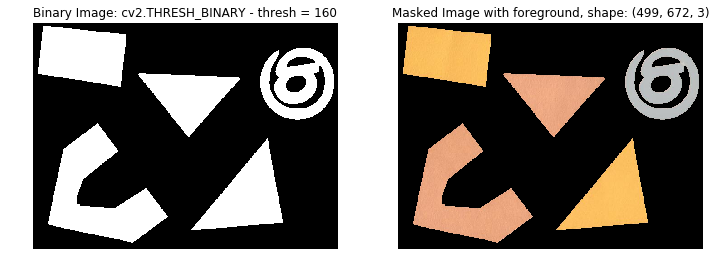

In [2]:
#importing library
import cv2
import matplotlib.pyplot as plt
import numpy as np 

# reading an image
shapes_bgr= cv2.imread("./data/shapes_1.jpg")

# converting to grsyscale and rgb
shapes_rgb= cv2.cvtColor(shapes_bgr, cv2.COLOR_BGR2RGB)
shapes_gray= cv2.cvtColor(shapes_bgr, cv2.COLOR_BGR2GRAY)

# blur the image
blurred_image= cv2.GaussianBlur(src= shapes_gray, ksize= (5,5), sigmaX= 0, sigmaY= 0)

# binary thresholding: cv2.THRESH_BINARY
retval, binary_image= cv2.threshold(src= blurred_image, thresh= 160, maxval= 255, type= cv2.THRESH_BINARY)

# masking the foreground from the background
result_image= np.stack((binary_image,binary_image,binary_image) ,axis= 0) # converting to rgb
result_image= np.transpose(result_image, [1,2,0])

result_image = np.where(np.array(result_image) == 255, shapes_rgb, result_image)# red

# plotting
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Binary Image: cv2.THRESH_BINARY - thresh = 160")
ax1.axis("off")
ax1.imshow(binary_image,cmap="gray")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Masked Image with foreground, shape: {}".format(result_image.shape))
ax2.axis("off")
ax2.imshow(result_image)
plt.show()

#### ii. Inverse Binary Thresholding:
Inverse binary thresholding is just an opposite operation of binary threshold, where the threshold > maxVal, becomes 0(black), else all 255 (white). The operation is similar to cv2.bitwise_not where the pixel values gets inverted after applying thresholding. 

Double threshold which contains threshold, maxval and and type as cv2.THRESH_BINARY_INV

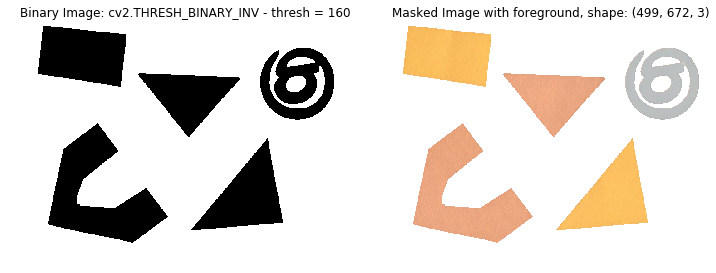

In [4]:
#importing library
import cv2
import matplotlib.pyplot as plt
import numpy as np

# reading an image
shapes_bgr= cv2.imread("./data/shapes_1.jpg")

# converting to grsyscale and rgb
shapes_rgb= cv2.cvtColor(shapes_bgr, cv2.COLOR_BGR2RGB)
shapes_gray= cv2.cvtColor(shapes_bgr, cv2.COLOR_BGR2GRAY)

# blur the image
blurred_image= cv2.GaussianBlur(src= shapes_gray, ksize= (5,5), sigmaX= 0, sigmaY= 0)

# binary thresholding: cv2.THRESH_BINARY_INV
retval, binary_image_inv= cv2.threshold(src= blurred_image, thresh= 160, maxval= 255, type= cv2.THRESH_BINARY_INV) # thresh > 160, 0. else 255

# masking the foreground from the background
mask= np.stack((binary_image_inv,binary_image_inv,binary_image_inv) ,axis= 0) # converting to rgb
mask= np.transpose(mask, [1,2,0])

mask = np.where(np.array(mask) == 0, shapes_rgb, mask)# red

# plotting
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Binary Image: cv2.THRESH_BINARY_INV - thresh = 160")
ax1.axis("off")
ax1.imshow(binary_image_inv,cmap="gray")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Masked Image with foreground, shape: {}".format(result_image.shape))
ax2.axis("off")
ax2.imshow(mask)
plt.show()

#### iii. Truncated Thresholding:
The group having pixel intensities greater than the set threshold, is truncated to the set threshold or in other words, the pixel values are set to be same as the set threshold.
All other values remain the same.                    

Single threshold which is applied to cv2.THRESH_TRUNC - src(x,y) > threshold becomes thresold value itself, else as same src(x,y) value remains.               

Before applying the threshold value to the truncated thresholding technique, check the histogram which is plotted above for optimum threshold to be used

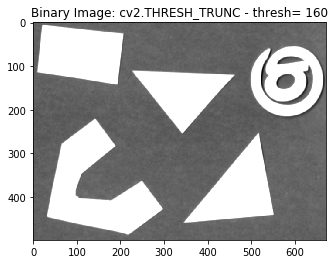

In [17]:
#importing library
import cv2
import matplotlib.pyplot as plt
import numpy as np 

# reading an image
shapes_bgr= cv2.imread("./data/shapes_1.jpg")

# converting to grsyscale and rgb
shapes_rgb= cv2.cvtColor(shapes_bgr, cv2.COLOR_BGR2RGB)
shapes_gray= cv2.cvtColor(shapes_bgr, cv2.COLOR_BGR2GRAY)

# blur the image
blurred_image= cv2.GaussianBlur(src= shapes_gray, ksize= (5,5), sigmaX= 0, sigmaY= 0)

# Truncated thresholding: cv2.THRESH_TRUNC
retval, binary_image_trunc= cv2.threshold(src= blurred_image, thresh= 160, maxval= 0, type= cv2.THRESH_TRUNC)


# plotting
plt.title("Binary Image: cv2.THRESH_TRUNC - thresh= 160")
plt.imshow(binary_image_trunc,cmap="gray")
plt.show()

In [15]:
# as we can see the max value in the numpy array of binary image truncated has the value of 160 which is threshold value given
np.unique(binary_image_trunc)

array([ 27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160], dtype=uint8)

#### iv. Threshold to Zero:
A very simple thresholding technique, wherein we set the pixel intensity to ‘0’, for all the pixels of the group having pixel intensity value, less than the threshold.

Single Threshold where the technique takes threshold and type as cv2.THRESH_TOZERO - src(x,y) when value is greater than threshold, else 0 (black)

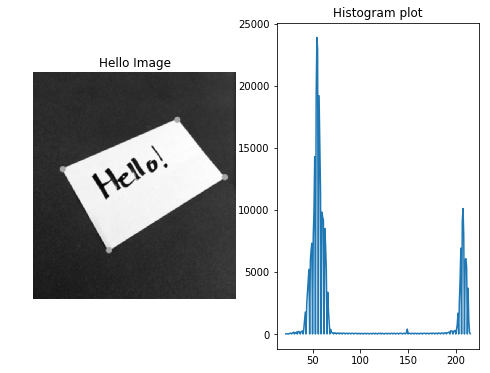

In [31]:
#importing library
import cv2
import matplotlib.pyplot as plt
import numpy as np 

# reading an image
hello_bgr= cv2.imread("./data/hello.jpg")

# converting to grsyscale and rgb
hello_rgb= cv2.cvtColor(hello_bgr, cv2.COLOR_BGR2RGB)
hello_gray= cv2.cvtColor(hello_bgr, cv2.COLOR_BGR2GRAY)

# blur the image
blurred_image= cv2.GaussianBlur(src= hello_gray, ksize= (5,5), sigmaX= 0, sigmaY= 0)


hists, bin_edges= np.histogram(a= blurred_image, bins= 256)

# plotting
fig = plt.figure(figsize = (8,6))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Hello Image")
ax1.axis("off")
ax1.imshow(blurred_image,cmap= "gray")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Histogram plot")
#ax2.axis("off")
ax2.plot(bin_edges[:-1], hists)
plt.show()


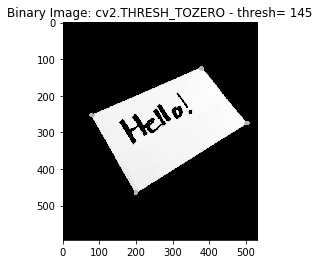

In [33]:
# Thresholding to zero: threshold > 175 becomes the src(x,y) else 0 (black)

# thresholding to zero: cv2.THRESH_TOZERO
retval, binary_image_tozero= cv2.threshold(src= blurred_image, thresh= 145, maxval= 0, type= cv2.THRESH_TOZERO)


# plotting
plt.title("Binary Image: cv2.THRESH_TOZERO - thresh= 145")
plt.imshow(binary_image_tozero,cmap="gray")
plt.show()

#### v. Inverse threshold to zero:
This technique is just opposite to the pervious thresholding technique where src(x,y) =0 when the intensities are greater than the threshold, else src(x,y) remains

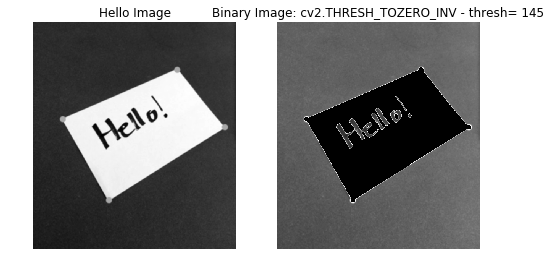

In [35]:
# importing library
import cv2
import matplotlib.pyplot as plt
import numpy as np 

# reading an image
hello_bgr= cv2.imread("./data/hello.jpg")

# converting to grsyscale and rgb
hello_rgb= cv2.cvtColor(hello_bgr, cv2.COLOR_BGR2RGB)
hello_gray= cv2.cvtColor(hello_bgr, cv2.COLOR_BGR2GRAY)

# blur the image
blurred_image= cv2.GaussianBlur(src= hello_gray, ksize= (5,5), sigmaX= 0, sigmaY= 0)

# thresholding to zero: cv2.THRESH_TOZERO
retval, binary_image_tozero_inv= cv2.threshold(src= blurred_image, thresh= 145, maxval= 0, type= cv2.THRESH_TOZERO_INV)




# plotting
fig = plt.figure(figsize = (8,6))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Hello Image")
ax1.axis("off")
ax1.imshow(blurred_image,cmap= "gray")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Binary Image: cv2.THRESH_TOZERO_INV - thresh= 145")
ax2.axis("off")
ax2.imshow(binary_image_tozero_inv,cmap="gray")
plt.show()




### Automatic Thresholding:
A problem with simple thresholding is that you have to manually specify the threshold value. We can manually check how good a threshold is by trying different values but it is tedious and it may break down in the real world.


#### OTSU Thresholding: 
Otsu's thresholding method involves iterating through all the possible threshold values and calculating a measure of spread for the pixel levels each side of the threshold, i.e. the pixels that either fall in foreground or background. uses cv2.THRESH_OTSU

**Link:** https://learnopencv.com/otsu-thresholding-with-opencv/

Otsu thresholded value:  105.0


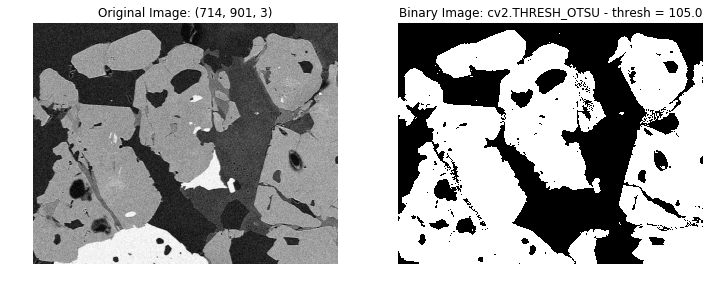

In [41]:
#importing library
import cv2
import matplotlib.pyplot as plt
import numpy as np 

# reading an image
shapes_bgr= cv2.imread("./data/microscopic_image.jpg")

# converting to grsyscale and rgb
shapes_rgb= cv2.cvtColor(shapes_bgr, cv2.COLOR_BGR2RGB)
shapes_gray= cv2.cvtColor(shapes_bgr, cv2.COLOR_BGR2GRAY)

# blur the image
blurred_image= cv2.GaussianBlur(src= shapes_gray, ksize= (5,5), sigmaX= 0, sigmaY= 0)


# OTSU thresholding
otsu_thresh, binary_image_otsu= cv2.threshold(src= blurred_image, thresh= 0, maxval= 255, type= cv2.THRESH_OTSU)
print("Otsu thresholded value: ",otsu_thresh)

# plotting
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image: {}".format(shapes_rgb.shape))
ax1.axis("off")
ax1.imshow(blurred_image,cmap= "gray")


ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Binary Image: cv2.THRESH_OTSU - thresh = {}".format(otsu_thresh))
ax2.axis("off")
ax2.imshow(binary_image_otsu,cmap="gray")
plt.show()

## Adaptive Thresholding:
A global value as thresholding technique,may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.


Global thresholding determines the threshold value based on the histogram of the overall pixel intensity distribution of the image. In contrast, adaptive thresholding computes the threshold value for each fractional region of the image, so that each fractional region has a different threshold value.

cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.                  
cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

**Links:** https://www.pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/

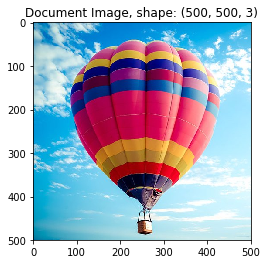

In [140]:
# importing the libary
import cv2
import matplotlib.pyplot as plt
import numpy as np

# reading an image
image_bgr= cv2.imread("./data/baloon.jpg")

# converting to rgb and grayscale
image_rgb= cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image_gray= cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# plotting the image
plt.title("Document Image, shape: {}".format(image_rgb.shape))
plt.imshow(image_rgb)
plt.show()

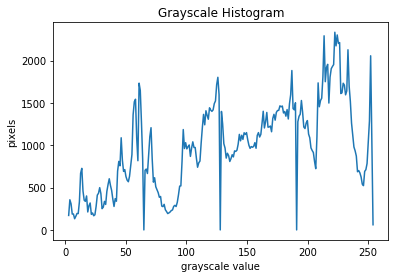

In [141]:
#Blurring the image
image_blur= cv2.medianBlur(image_gray, 7)

#plotting the histogram of the grayscale image
# The histogram is computed over the flattened array.
hists, bin_edges= np.histogram(a= image_blur, bins= 256)

plt.plot(bin_edges[:-1], hists)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.show()

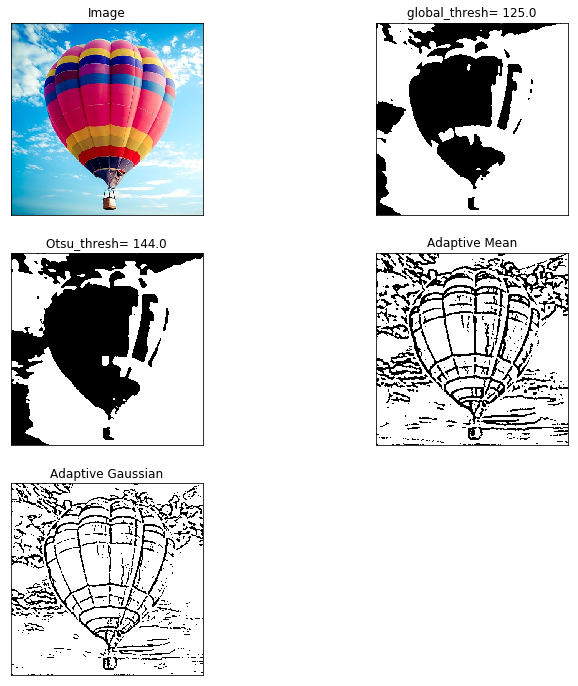

In [149]:
# performing adaptive threshlding
# Global Thresholding
th_val,thresh_global= cv2.threshold(src= image_blur, thresh= 125,maxval= 255,type= cv2.THRESH_BINARY)

# Otsu thresholding
th_otsu, thresh_otsu= cv2.threshold(src= image_blur, thresh= 0, maxval= 255, type= cv2.THRESH_OTSU)

# Adaptive mean thresholding
thresh_image_mean= cv2.adaptiveThreshold(src= image_blur, maxValue= 255, adaptiveMethod= cv2.ADAPTIVE_THRESH_MEAN_C, 
                                             thresholdType= cv2.THRESH_BINARY, blockSize= 11, C= 2)

# Adaptive Gaussian thresholding
thresh_image_gauss= cv2.adaptiveThreshold(src= image_blur, maxValue= 255, adaptiveMethod= cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                             thresholdType= cv2.THRESH_BINARY, blockSize= 11, C= 2)

titles = ['Image', 'global_thresh= {}'.format(th_val), 'Otsu_thresh= {}'.format(th_otsu),
            'Adaptive Mean', 'Adaptive Gaussian']

images= [image_rgb, thresh_global, thresh_otsu, thresh_image_mean, thresh_image_gauss]
plt.figure(figsize= (12,12))
for i in range(5):
    
    plt.subplot(3,2,i+1)
    plt.imshow(images[i],cmap= 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()